In [1]:
import datetime
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import Normalizer

import statsmodels.api as sm


In [2]:
# import pandas as pd

# Read data from train.csv
data = pd.read_csv('house-prices-advanced-regression-techniques/train.csv')

# Show the first 5 rows
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data['SalePrice'].mean()

180921.19589041095

In [4]:
data.shape

(1460, 81)

In [5]:
selected_features = ['OverallQual', 'BedroomAbvGr', 'GarageCars', 'FullBath', 'GrLivArea']

In [6]:
X = data[selected_features]

y = data['SalePrice']

# imputer = SimpleImputer(strategy="mean")
# X = pd.DataFrame(imputer.fit_transform(X), columns= imputer.get_feature_names_out())

In [7]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [8]:
# Create a Linear Regression model
model = LinearRegression()


# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

Mean Squared Error: 1749936025.5931282
Root Mean Squared Error: 41832.23667930187


In [9]:
model.coef_

array([25111.14712806, -9149.25660938, 21069.61456549,  1927.11001388,
          56.44300459])

In [10]:
model.intercept_

-72622.68631023428

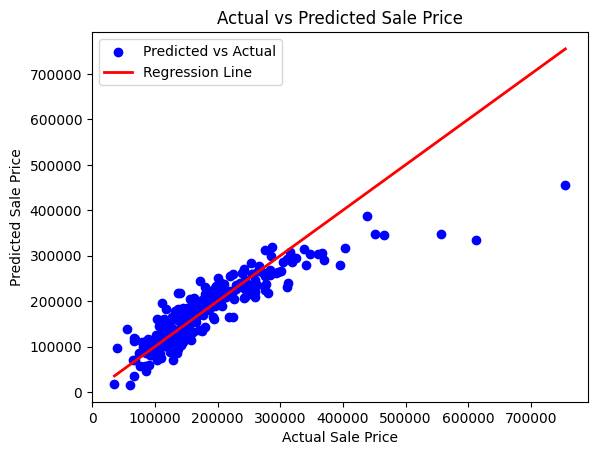

In [11]:
import matplotlib.pyplot as plt

# Scatter plot
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')

# Regression line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Regression Line')

# Labels and title
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted Sale Price')
plt.legend()

# Show plot
plt.show()
